In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from sampled import sampled
import seaborn as sns
import theano.tensor as tt

matplotlib.rcParams['figure.figsize'] = (0.89 * 16, 8)
matplotlib.rcParams['lines.linewidth'] = 5

# An Introduction to Probabilistic Programming


<center><img src="images/commute.png"></img></center>

# An Introduction to Probabilistic Programming


<center><img src="images/PyMC3.png"></img></center>

# An Introduction to Probabilistic Programming


<center><img src="images/commute.png"></img></center>

# Probabilistic Programming

In [2]:
@sampled
def commute():
    train_time = pm.SkewNormal('train_time', mu=40., sd=10., alpha=15.)
    takes_bike = pm.Binomial('takes_bike', n=1, p=0.1)
    bike_time = pm.Normal('bike_time', mu=20., sd=3.)
    walk_time = pm.Normal('walk_time', mu=5., sd=1.)
    t_time = pm.SkewNormal('t_time', mu=15., sd=5., alpha=4.)
    total_time = pm.Normal('total_time', 
                           mu=train_time + tt.switch(takes_bike, bike_time, walk_time+t_time), 
                           sd=1)

<center><img src="images/commute.png" style="height: 400px;"></img></center>

# Sampling from a generative model

In [3]:
with commute():
    base_trace = pm.sample(2000)

Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
100%|██████████| 2500/2500 [00:21<00:00, 114.92it/s]


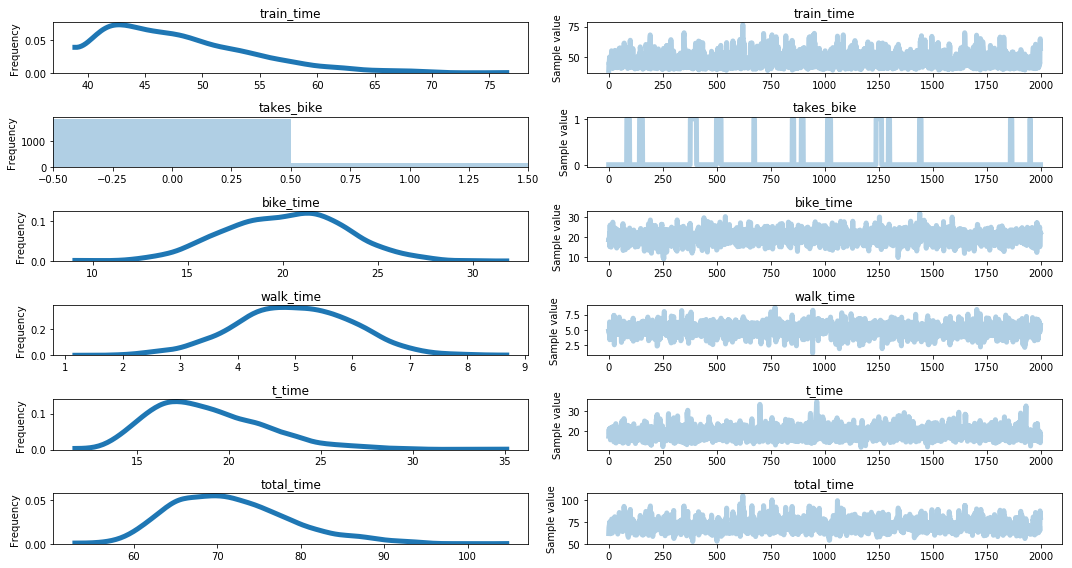

In [4]:
pm.traceplot(base_trace, combined=True, figsize=(15, 8));

# Commute time

In [5]:
base_trace['total_time'].mean()

71.572328483309803

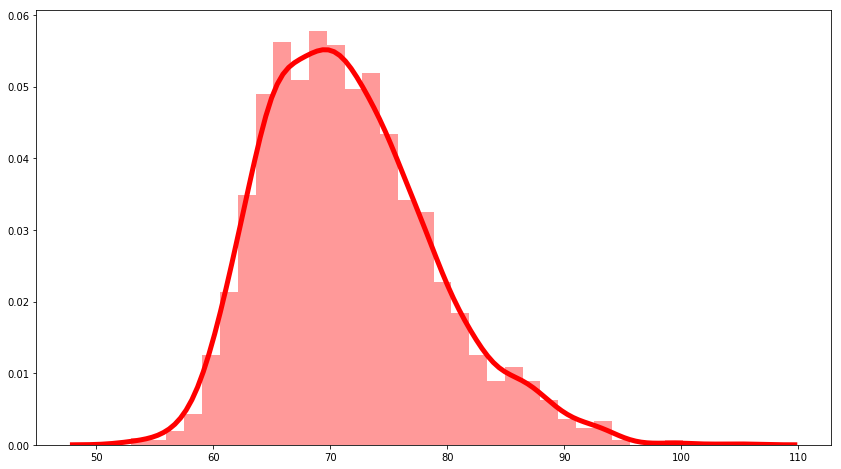

In [6]:
sns.distplot(base_trace['total_time'], color='r');

## "My train is on time!"

In [7]:
with commute(train_time=40):
    on_time_train = pm.sample(2000)

Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
100%|██████████| 2500/2500 [00:08<00:00, 295.70it/s]


<center><img src="images/commuter_train.png" style="height: 150px;"></img></center>

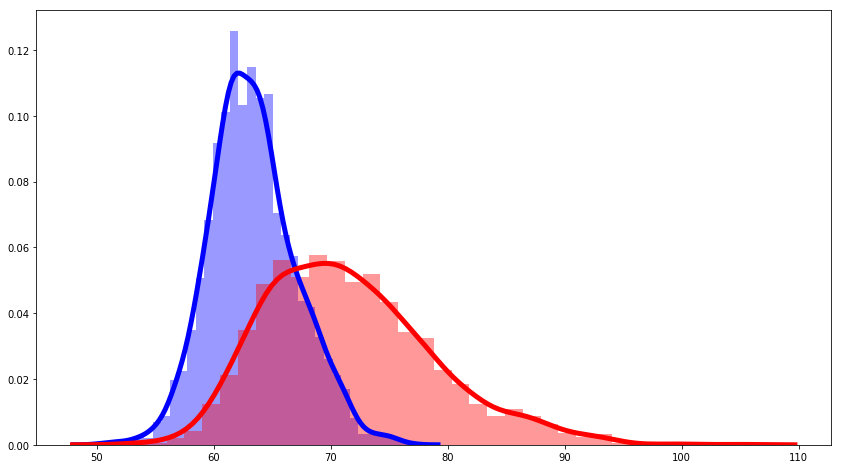

In [8]:
sns.distplot(on_time_train['total_time'], color='b');
sns.distplot(base_trace['total_time'], color='r');

## "My train is 10 minutes late!"

In [9]:
with commute(train_time=50):
    late_train = pm.sample(2000)

Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
Assigned NUTS to total_time
100%|██████████| 2500/2500 [00:09<00:00, 271.26it/s]


<center><img src="images/commuter_train.png" style="height: 150px;"></img></center>

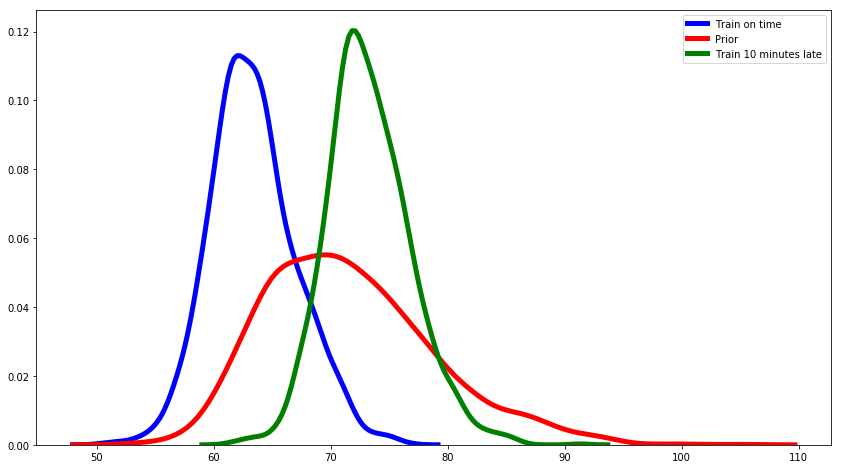

In [10]:
sns.kdeplot(on_time_train['total_time'], label='Train on time', color='b')
sns.kdeplot(base_trace['total_time'], label='Prior', color='r');
sns.kdeplot(late_train['total_time'], label='Train 10 minutes late', color='g');

# "You're early -- how was the bike ride?"

In [11]:
with commute(total_time=55):
    early_trace = pm.sample(2000)

Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
 99%|█████████▉| 2478/2500 [00:06<00:00, 400.12it/s]/Users/colin/anaconda3/envs/pydata_nyc20173.6/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 4 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:06<00:00, 399.53it/s]


# "You're early -- how was the bike ride?"

<center><img src="images/bike.png" style="height: 150px;"></img></center>

In [12]:
early_trace['takes_bike'].mean(), base_trace['takes_bike'].mean()

(0.96450000000000002, 0.081500000000000003)

# What else changes when I am 15 minutes early?

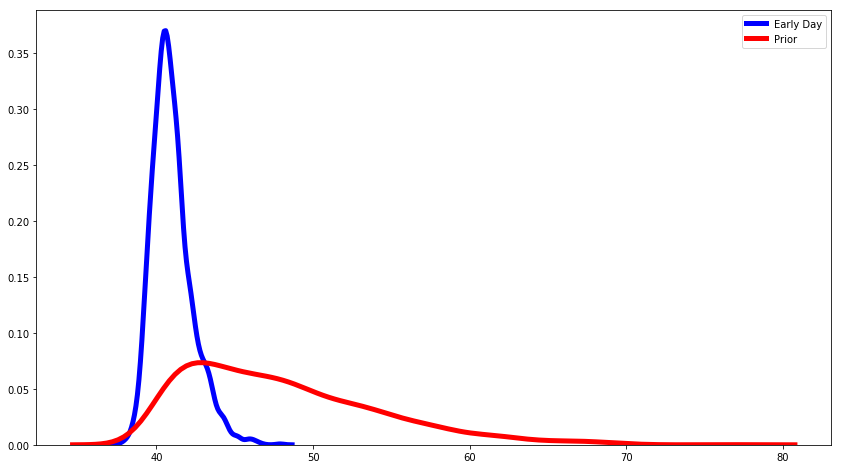

In [13]:
sns.kdeplot(early_trace['train_time'], label='Early Day', color='b');
sns.kdeplot(base_trace['train_time'], label='Prior', color='r');

<center><img src="images/commuter_train.png" style="height: 150px;"></img></center>

# What else changes when I am 15 minutes early?

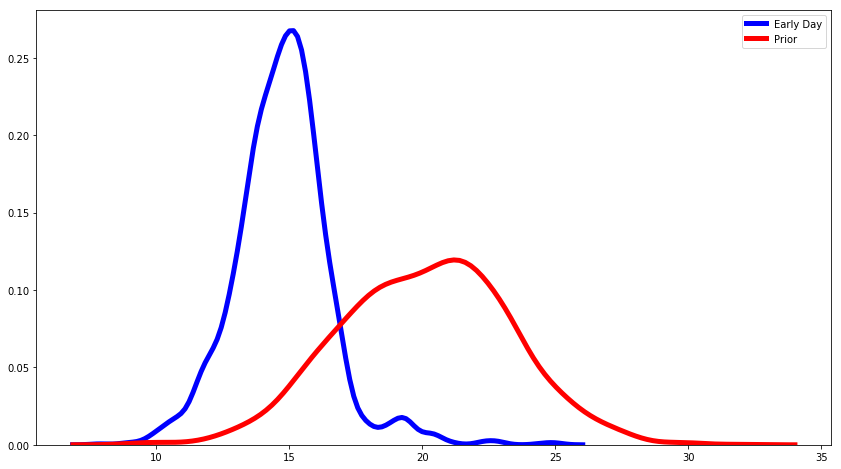

In [14]:
sns.kdeplot(early_trace['bike_time'], label='Early Day', color='b');
sns.kdeplot(base_trace['bike_time'], label='Prior', color='r');

<center><img src="images/bike.png" style="height: 150px;"></img></center>

# What else changes when I am 15 minutes early?

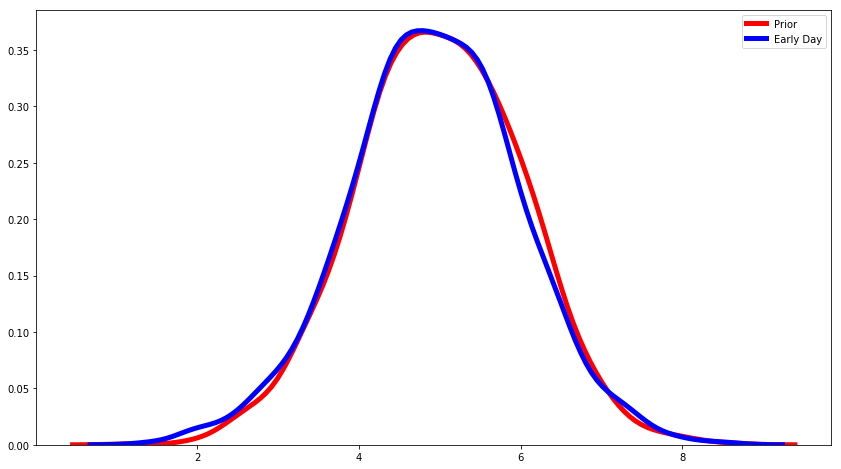

In [15]:
sns.kdeplot(base_trace['walk_time'], label='Prior', color='r');
sns.kdeplot(early_trace['walk_time'], label='Early Day', color='b');


# PyMC3 Supports Latex Representations in notebooks!

In [16]:
commute()

# Exercise 4 and 5

# Extreme data!

In [17]:
with commute(total_time=0.):
    no_time = pm.sample(2000)

Assigned NUTS to train_time
Assigned Metropolis to takes_bike
Assigned NUTS to bike_time
Assigned NUTS to walk_time
Assigned NUTS to t_time
100%|██████████| 2500/2500 [00:05<00:00, 420.08it/s]


# Extreme data!

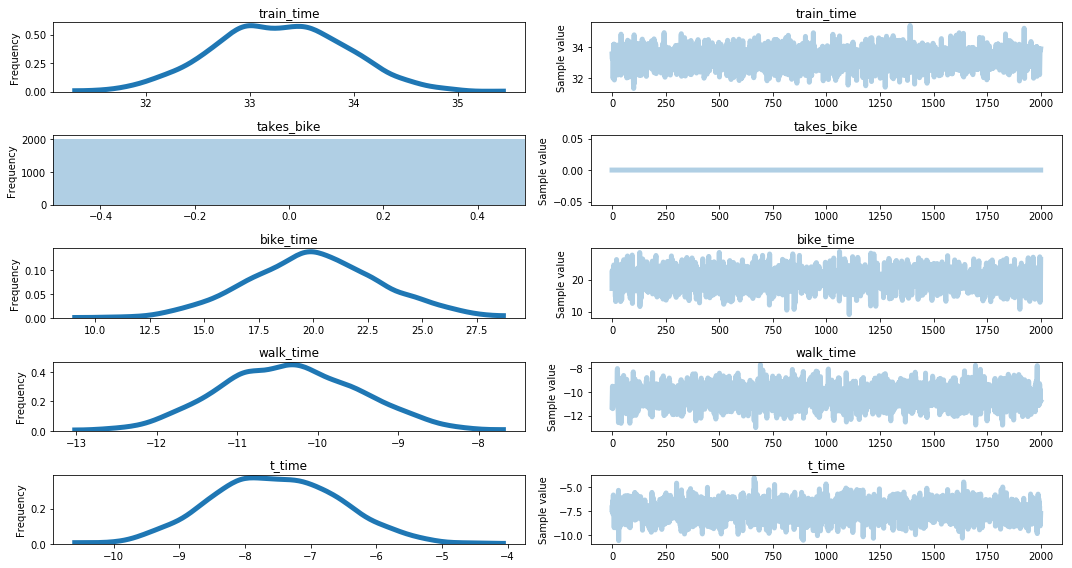

In [18]:
pm.traceplot(no_time, combined=True, figsize=(15, 8));

# Fine tuning distributions

In [19]:
@sampled
def bounded_commute():
    TrainSkewNormal = pm.Bound(pm.SkewNormal, lower=35.)
    BikeNormal = pm.Bound(pm.Normal, lower=15.)
    WalkNormal = pm.Bound(pm.Normal, lower=10.)
    TSkewNormal = pm.Bound(pm.SkewNormal, lower=10.)
    TotalNormal = pm.Bound(pm.Normal, lower=50.)
    
    train_time = TrainSkewNormal('train_time', mu=40., sd=10., alpha=15.)
    takes_bike = pm.Binomial('takes_bike', n=1, p=0.1)
    bike_time = BikeNormal('bike_time', mu=20., sd=3.)
    walk_time = WalkNormal('walk_time', mu=5., sd=1.)
    t_time = TSkewNormal('t_time', mu=15., sd=5., alpha=4.)
    total_time = TotalNormal('total_time', 
                           mu=train_time + tt.switch(takes_bike, bike_time, walk_time+t_time), 
                           sd=1)

# Fine tuning distributions

```python
with bounded_commute(total_time=0.):
    bounded_no_time = pm.sample(2000)
    
# ValueError: Bad initial energy: inf. The model might be misspecified.
```

# Exercise 5